In [313]:
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

## Table of contents

- Load data
- EDA on nodes and edges
- Adjacent Matrix in D3js
- Raw visualization in networkX with 4 layouts
- Improvements made on raw visualization
    - Edge width(indicated by normalized weights)
    - Circle size(indicated by weighted degree of centrality)
    - Circle color(indicated by age groups)
    - Miscellaneous(color map, font size, title)

### Load data

In [314]:
sheep = nx.read_graphml("sheep_data/sheep_ml.graphml")

In [366]:
sheep_node = pd.read_csv('sheep_data/sheep_age.csv')
sheep_edge = pd.read_csv('sheep_data/sheep_edges.csv')

In [347]:
sheep_node.shape

(28, 2)

In [348]:
sheep_edge.shape

(250, 3)

</br>

## Examine nodes and edges

#### Degree of centrality for each nodes

In [316]:
num_edges = nx.degree(sheep)
print(f"Number of edges for each nodes :\n{num_edges}")
print()
print(f"Number of edges for node ID 18:\n{num_edges['18']}")

Number of edges for each nodes :
[('1', 5), ('2', 19), ('3', 26), ('4', 26), ('5', 7), ('6', 19), ('7', 17), ('8', 18), ('9', 22), ('10', 4), ('11', 16), ('12', 11), ('13', 21), ('14', 22), ('15', 20), ('16', 19), ('17', 17), ('18', 23), ('19', 20), ('20', 19), ('21', 22), ('22', 19), ('23', 21), ('24', 17), ('25', 18), ('26', 22), ('27', 12), ('28', 18)]

Number of edges for node ID 18:
23


In [317]:
for i in range(len(num_edges)):
    print(f"Sheep ID {i+1} dominates {num_edges[f'{i+1}']} sheep")

Sheep ID 1 dominates 5 sheep
Sheep ID 2 dominates 19 sheep
Sheep ID 3 dominates 26 sheep
Sheep ID 4 dominates 26 sheep
Sheep ID 5 dominates 7 sheep
Sheep ID 6 dominates 19 sheep
Sheep ID 7 dominates 17 sheep
Sheep ID 8 dominates 18 sheep
Sheep ID 9 dominates 22 sheep
Sheep ID 10 dominates 4 sheep
Sheep ID 11 dominates 16 sheep
Sheep ID 12 dominates 11 sheep
Sheep ID 13 dominates 21 sheep
Sheep ID 14 dominates 22 sheep
Sheep ID 15 dominates 20 sheep
Sheep ID 16 dominates 19 sheep
Sheep ID 17 dominates 17 sheep
Sheep ID 18 dominates 23 sheep
Sheep ID 19 dominates 20 sheep
Sheep ID 20 dominates 19 sheep
Sheep ID 21 dominates 22 sheep
Sheep ID 22 dominates 19 sheep
Sheep ID 23 dominates 21 sheep
Sheep ID 24 dominates 17 sheep
Sheep ID 25 dominates 18 sheep
Sheep ID 26 dominates 22 sheep
Sheep ID 27 dominates 12 sheep
Sheep ID 28 dominates 18 sheep


In [318]:
for i in range(len(sheep.nodes)):
    print(f"Age of sheep ID {i+1}: {sheep.nodes[f'{i+1}']['age']}")

Age of sheep ID 1: 8
Age of sheep ID 2: 8
Age of sheep ID 3: 4
Age of sheep ID 4: 7
Age of sheep ID 5: 8
Age of sheep ID 6: 3
Age of sheep ID 7: 5
Age of sheep ID 8: 4
Age of sheep ID 9: 7
Age of sheep ID 10: 9
Age of sheep ID 11: 6
Age of sheep ID 12: 4
Age of sheep ID 13: 9
Age of sheep ID 14: 1
Age of sheep ID 15: 9
Age of sheep ID 16: 9
Age of sheep ID 17: 4
Age of sheep ID 18: 1
Age of sheep ID 19: 1
Age of sheep ID 20: 3
Age of sheep ID 21: 3
Age of sheep ID 22: 1
Age of sheep ID 23: 7
Age of sheep ID 24: 1
Age of sheep ID 25: 9
Age of sheep ID 26: 3
Age of sheep ID 27: 4
Age of sheep ID 28: 9


#### store ages

In [319]:
ages = np.zeros(len(sheep.nodes))
for i in range(len(sheep.nodes)):
    ages[i] = sheep.nodes[f"{i+1}"]['age']

print(ages)

[8. 8. 4. 7. 8. 3. 5. 4. 7. 9. 6. 4. 9. 1. 9. 9. 4. 1. 1. 3. 3. 1. 7. 1.
 9. 3. 4. 9.]


</br>

## Raw networkX graph in 4 layouts

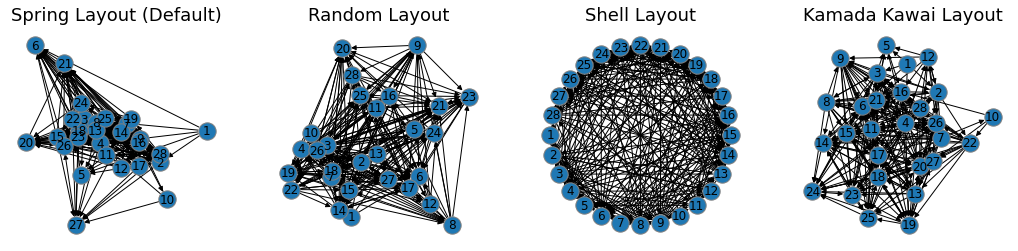

In [349]:
f = plt.figure(figsize=(18,4))
f.tight_layout()

# Subplot 1
plt.subplot(1, 4, 1)
nx.draw(sheep, with_labels=True, edgecolors='gray')
plt.title('Spring Layout (Default)', fontsize=18)

# Subplot 2
plt.subplot(1, 4, 2)
nx.draw_random(sheep, with_labels=True, edgecolors='gray')
plt.title('Random Layout', fontsize=18)

# Subplot 3
plt.subplot(1, 4, 3)
nx.draw_shell(sheep, with_labels=True, edgecolors='gray')
plt.title('Shell Layout', fontsize=18)

# Subplot 4
plt.subplot(1, 4, 4)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='gray')
plt.title('Kamada Kawai Layout', fontsize=18)

plt.savefig("raw_networkx.png")

</br>

## Make improvements on the raw visualization

- Use edge width to indicate normalized edge weight
- Use average weights for each nodes to indicate its dominance
- Group different ages of sheep into three main groups
- choose suitable gloabl color map

### Normalize weight to indicate edge width

In [367]:
sheep_edge['norm_weight'] = (sheep_edge['weight'] - sheep_edge['weight'].mean()) / sheep_edge['weight'].std()
sheep_edge

,source,target,weight,norm_weight
0,1,2,1,-0.747111
1,1,3,1,-0.747111
2,1,4,1,-0.747111
3,1,5,1,-0.747111
4,1,6,1,-0.747111
...,...,...,...,...
245,26,6,2,-0.289323
246,20,26,1,-0.747111
247,20,21,3,0.168466
248,27,26,1,-0.747111


### Calculate total weights for each node

In [368]:
total_weight = sheep_edge.groupby('source').weight.sum().reset_index()
total_weight.head()

,source,weight
0,1,5
1,2,35
2,3,63
3,4,25
4,5,2


In [369]:
total_weight = total_weight.rename(columns={'source':'id', 'weight':'total_weight'})
total_weight.shape

(27, 2)

In [370]:
sheep_node = sheep_node.merge(total_weight, how='left', on='id').fillna(0)

### Calculate average weight for each dominating nodes

In [371]:
avg_weight = sheep_edge.groupby('source').apply(lambda x: x['weight'].sum()/len(x)).reset_index()

In [372]:
avg_weight = avg_weight.rename(columns={'source':'id', 0:'avg_weight'})
avg_weight.head()

,id,avg_weight
0,1,1.000000
1,2,2.500000
2,3,3.500000
3,4,1.470588
4,5,1.000000


In [373]:
sheep_node = sheep_node.merge(avg_weight, how='left', on='id').fillna(0)
sheep_node

,id,age,total_weight,avg_weight
0,1,8,5.0,1.000000
1,2,8,35.0,2.500000
2,3,4,63.0,3.500000
3,4,7,25.0,1.470588
4,5,8,2.0,1.000000
5,6,3,0.0,0.000000
6,7,5,43.0,2.687500
7,8,4,56.0,4.000000
8,9,7,52.0,3.250000
9,10,9,3.0,1.000000


### Bin different ages into three groups

In [374]:
sheep_node['age_group'] = pd.cut(sheep_node['age'], bins=[0, 3, 6, 9])

In [375]:
sheep_node['age_group'] = pd.Categorical(sheep_node['age_group'])
sheep_node['age_group'].cat.codes

0     2
1     2
2     1
3     2
4     2
5     0
6     1
7     1
8     2
9     2
10    1
11    1
12    2
13    0
14    2
15    2
16    1
17    0
18    0
19    0
20    0
21    0
22    2
23    0
24    2
25    0
26    1
27    2
dtype: int8

In [377]:
sheep_node.head()

,id,age,total_weight,avg_weight,age_group
0,1,8,5.0,1.000000,"(6, 9]"
1,2,8,35.0,2.500000,"(6, 9]"
2,3,4,63.0,3.500000,"(3, 6]"
3,4,7,25.0,1.470588,"(6, 9]"
4,5,8,2.0,1.000000,"(6, 9]"


In [390]:
sheep_edge

,source,target,weight,norm_weight
0,1,2,1,-0.747111
1,1,3,1,-0.747111
2,1,4,1,-0.747111
3,1,5,1,-0.747111
4,1,6,1,-0.747111
...,...,...,...,...
245,26,6,2,-0.289323
246,20,26,1,-0.747111
247,20,21,3,0.168466
248,27,26,1,-0.747111


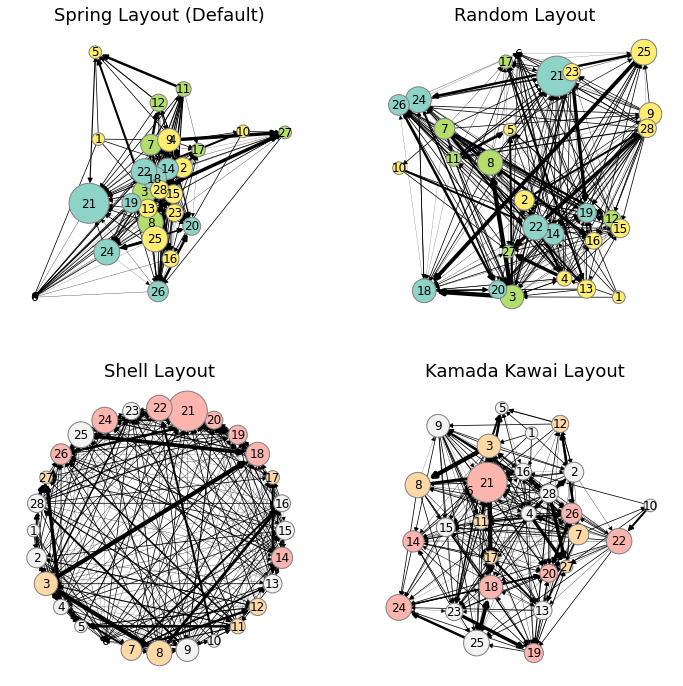

In [379]:
f = plt.figure(figsize=(12,12))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(sheep, with_labels=True, edgecolors='gray', 
        node_color=sheep_node['age_group'].cat.codes, 
        node_size=sheep_node.avg_weight*160.0,
        width=sheep_edge.norm_weight,
        cmap=plt.cm.Set3)
plt.title('Spring Layout (Default)', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw_random(sheep, with_labels=True, edgecolors='gray', 
               node_color=sheep_node['age_group'].cat.codes, 
               node_size=sheep_node.avg_weight*160.0,
               width=sheep_edge.norm_weight,
               cmap=plt.cm.Set3)
plt.title('Random Layout', fontsize=18)

# Subplot 3
plt.subplot(2, 2, 3)
nx.draw_shell(sheep, with_labels=True, edgecolors='grey', 
              node_color=sheep_node['age_group'].cat.codes, 
              node_size=sheep_node.avg_weight*160.0,
              width=sheep_edge.norm_weight,
              cmap=plt.cm.Pastel1)
plt.title('Shell Layout', fontsize=18)

# Subplot 4
plt.subplot(2, 2, 4)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='grey', 
                     node_color=sheep_node['age_group'].cat.codes, 
                     node_size=sheep_node.avg_weight*160.0,
                     width=sheep_edge.norm_weight,
                     cmap=plt.cm.Pastel1)
plt.title('Kamada Kawai Layout', fontsize=18)
plt.savefig('improved_networkx.png')

In [344]:
sheep_node.total_weight

0      5
1     35
2     63
3     25
4      2
5     43
6     56
7     52
8      3
9     14
10    13
11    30
12    31
13    24
14    16
15     8
16    35
17    16
18     4
19    10
20    65
21    17
22    25
23    25
24     8
25     1
26    32
Name: total_weight, dtype: int64

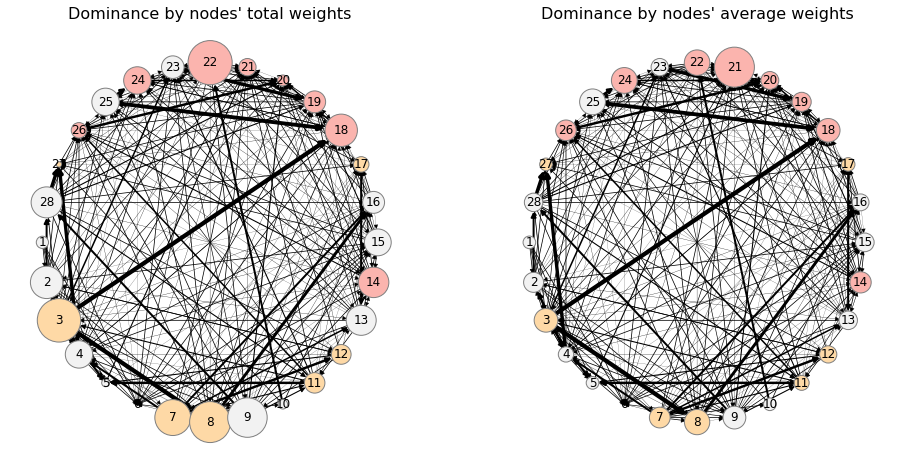

In [385]:
f = plt.figure(figsize=(16,8))
f.tight_layout()

# Subplot 3
plt.subplot(1, 2, 1)
nx.draw_shell(sheep, with_labels=True, edgecolors='grey', 
              node_color=sheep_node['age_group'].cat.codes, 
              node_size=sheep_node.total_weight*30.0,
              width=sheep_edge.norm_weight,
              cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' total weights", fontsize=16)

# Subplot 4
plt.subplot(1, 2, 2)
nx.draw_shell(sheep, with_labels=True, edgecolors='grey', 
                     node_color=sheep_node['age_group'].cat.codes, 
                     node_size=sheep_node.avg_weight*160.0,
                     width=sheep_edge.norm_weight,
                     cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' average weights", fontsize=16)
plt.savefig('2_types_dominance_shell.png')

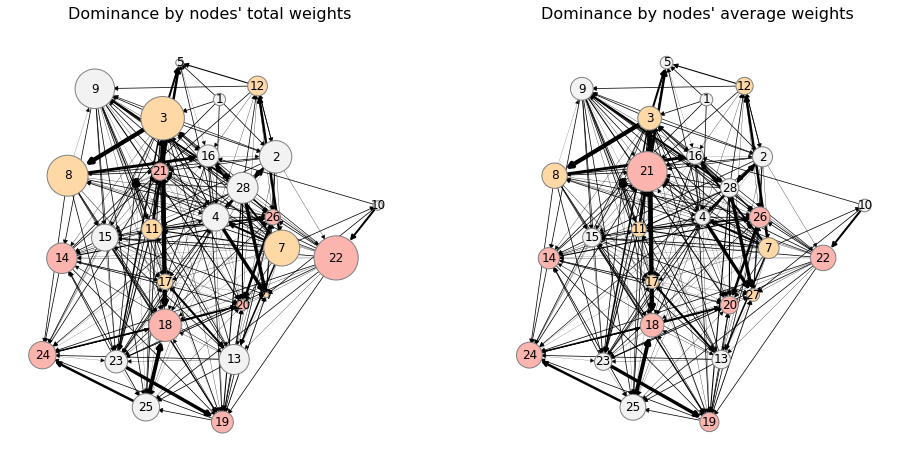

In [386]:
f = plt.figure(figsize=(16,8))
f.tight_layout()

# Subplot 3
plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='grey', 
              node_color=sheep_node['age_group'].cat.codes, 
              node_size=sheep_node.total_weight*30.0,
              width=sheep_edge.norm_weight,
              cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' total weights", fontsize=16)

# Subplot 4
plt.subplot(1, 2, 2)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='grey', 
                     node_color=sheep_node['age_group'].cat.codes, 
                     node_size=sheep_node.avg_weight*160.0,
                     width=sheep_edge.norm_weight,
                     cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' average weights", fontsize=16)
plt.savefig('2_types_dominance.png')

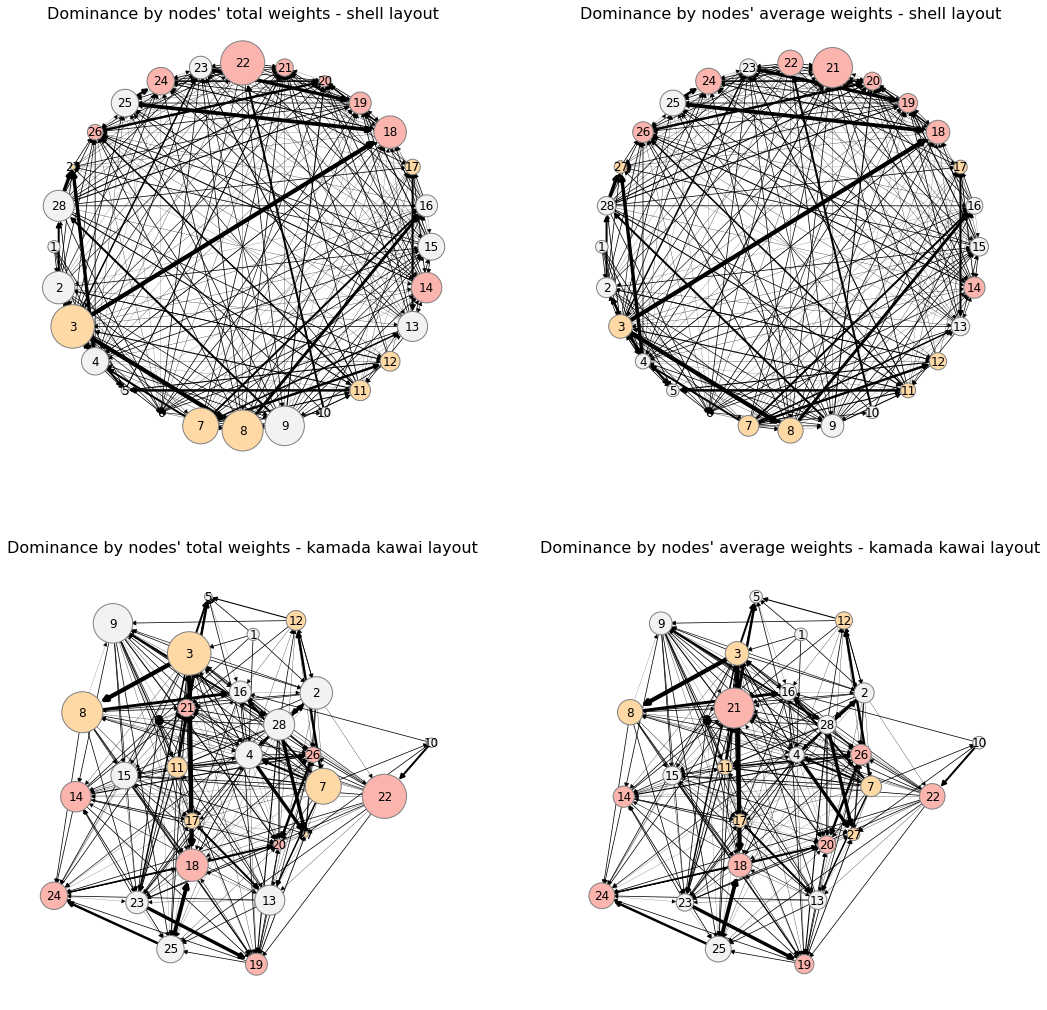

In [389]:
f = plt.figure(figsize=(18,18))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw_shell(sheep, with_labels=True, edgecolors='grey', 
              node_color=sheep_node['age_group'].cat.codes, 
              node_size=sheep_node.total_weight*30.0,
              width=sheep_edge.norm_weight,
              cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' total weights - shell layout", fontsize=16)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw_shell(sheep, with_labels=True, edgecolors='grey', 
                     node_color=sheep_node['age_group'].cat.codes, 
                     node_size=sheep_node.avg_weight*160.0,
                     width=sheep_edge.norm_weight,
                     cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' average weights - shell layout", fontsize=16)

# Subplot 3
plt.subplot(2, 2, 3)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='grey', 
              node_color=sheep_node['age_group'].cat.codes, 
              node_size=sheep_node.total_weight*30.0,
              width=sheep_edge.norm_weight,
              cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' total weights - kamada kawai layout", fontsize=16)

# Subplot 4
plt.subplot(2, 2, 4)
nx.draw_kamada_kawai(sheep, with_labels=True, edgecolors='grey', 
                     node_color=sheep_node['age_group'].cat.codes, 
                     node_size=sheep_node.avg_weight*160.0,
                     width=sheep_edge.norm_weight,
                     cmap=plt.cm.Pastel1)
plt.title("Dominance by nodes' average weights - kamada kawai layout", fontsize=16)
plt.savefig('total_weight_vs_avg_wight.png')

### Process for adajacent matrix

In [283]:
sheep_dic = {}

node_list = []
for index, rows in sheep_node.iterrows():
    row_dic = {}
    row_dic["id"] = str(rows['id'])
    row_dic["group"] = rows['group']
    node_list.append(row_dic)

edge_list = []
for index, rows in sheep_edge.iterrows():
    row_dic = {}
    row_dic["source"] = str(int(rows["source"]))
    row_dic["target"] = str(int(rows["target"]))
    row_dic["value"] = int(rows["weight"])
    edge_list.append(row_dic)
    
sheep_dic['nodes'], sheep_dic['links'] = node_list, edge_list

In [ ]:
#sheep_json = json.dumps(sheep_dic) 
with open("sheep.json", "w") as outfile:
    json.dump(sheep_dic, outfile)